# Лабораторная работа 4. Вариант 5

In [30]:
import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

## Задание 1. 
Выбрать функцию $f(x)$ (не самую тривиальную).

$$f(x) = e^{2x+1}+3\sin(3x+\frac{\pi}{7})+4\sh(3x+2) - 3$$

In [31]:
def f(x):
    return math.exp(2 * x + 1) + 3 * math.sin(3 * x + math.pi / 7) + 3 * math.sinh(3 * x + 2) - 3

## Задание 2. 
Сгенерировать $N = 20$ точек на интервале $[0, 1]$ и разбить на 2 множества
(тренировочный и тестовый наборы по 10 точек). Сгенерировать шум $\varepsilon = (\varepsilon_1, \varepsilon_2, ..., \varepsilon_N), \varepsilon \in N(0,1)$. Значения рассчитать по формуле $y = f(x) + \sigma \varepsilon$.
Изобразить наборы точек на плоскости разным цветом.

In [32]:
X = np.linspace(0, 1, 20)
epsilon = np.random.rand(20)

y = [f(x) + 0.1 * e for x, e in zip(X, epsilon)]

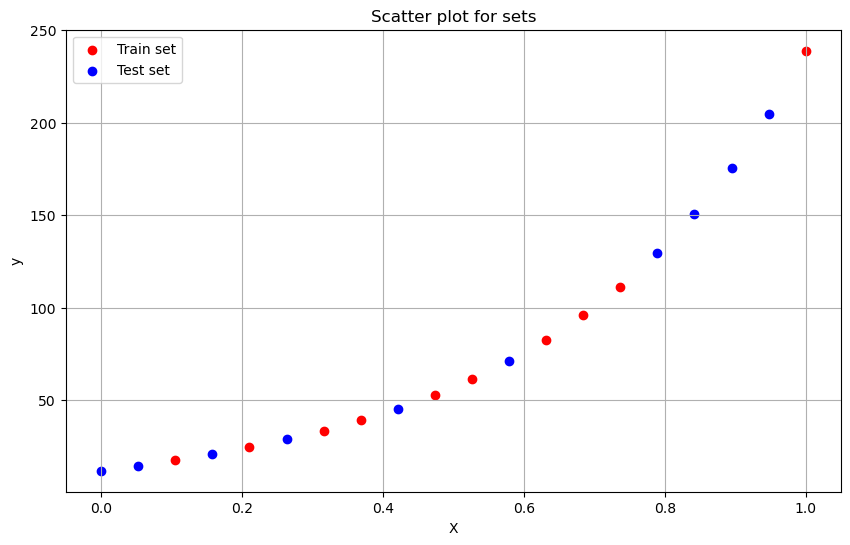

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

plt.figure(figsize=(10,6))
plt.title('Scatter plot for sets')

plt.scatter(X_train, y_train, c='r', label='Train set')
plt.scatter(X_test, y_test, c='b', label='Test set')

plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

## Задание 3.

МНК (методом наименьших квадратов) решить задачу линейной регрессии,
приблизить тренировочные данные многочленом 1 степени, для
нахождения коэффициентов регрессии использовать:

3.1. Точную формулу;

3.2. Градиентный спуск (алгоритм реализовать самому).

### Задание 3.1. Точная формула.

Многочлен первой степени для модели линейной регрессии имеет вид:
$$y = ax + b,$$
где $a - $коэффициент наклона, $b - $коэффициент сдвига.
По МНК можно получить следующие выражения для коэффициентов:
$$\hat{a} = \frac{n \sum X_i y_i - \sum X_i \sum y_i}{n \sum X_i^2 - (\sum X_i)^2},$$
$$\hat{b} = \frac{\sum y_i - \hat{a}\sum X_i}{n}$$

In [34]:
def least_square(X, y):
    n = len(X)

    X_sum = np.sum(X)
    X_squarred_sum = np.sum(X**2)
    y_sum = np.sum(y)
    Xy_sum = np.sum(X * y)

    a = (n * Xy_sum - X_sum * y_sum) / (n * X_squarred_sum - X_sum**2)
    b = (y_sum - a * X_sum) / n

    return a * X + b

y_least_square = least_square(X_train, y_train)

### Задание 3.2. Градиентный спуск.

In [35]:
def gradient_descent(X, y, degree, alpha=0.001, epochs=1000):
    coefficients = np.zeros(degree + 1)
    n = len(X)

    for _ in range(epochs):
        y_pred = np.polyval(coefficients, X)
        error = y_pred - y

        grad = np.zeros(degree + 1)

        for i in range(len(grad)):
            grad[i] = 2 / n * np.sum(error * X**i)

        coefficients -= alpha * grad

    return coefficients

coefficients = gradient_descent(X_train, y_train, 2)
y_gradient_descent = np.polyval(coefficients, X_train)

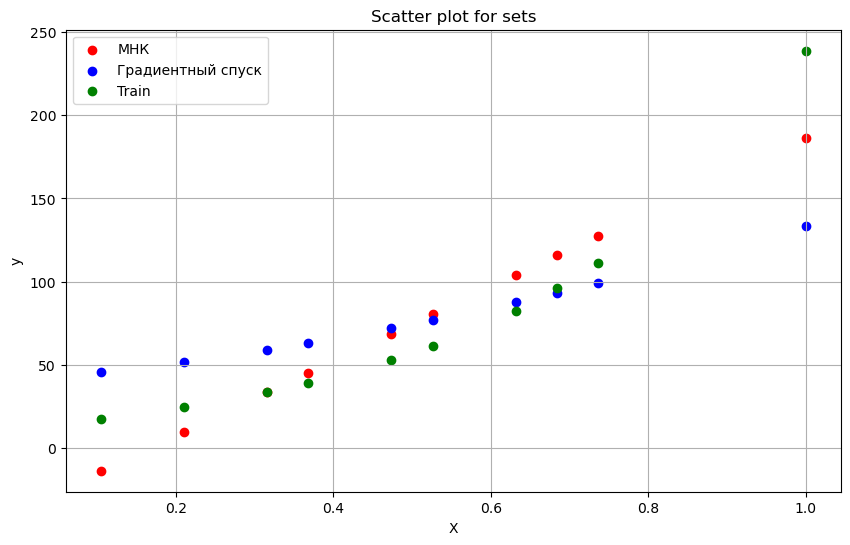

In [36]:
plt.figure(figsize=(10,6))
plt.title('Scatter plot for sets')

plt.scatter(X_train, y_least_square, c='r', label='МНК')
plt.scatter(X_train, y_gradient_descent, c='b', label='Градиентный спуск')
plt.scatter(X_train, y_train, c='g', label='Train')

plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

## Задание 4.

Приблизить тренировочные данные многочленами 2, 5 и 9 степеней.
Построить график зависимости ошибки MSE (средний квадрат ошибки) на
тренировочных и тестовых данных от степени.

In [37]:
mse = []
degrees = [2, 5, 9]

for i in degrees:
    coefficients = gradient_descent(X_train, y_train, i)
    y_pred = np.polyval(coefficients, X_train)

    mse.append(mean_squared_error(y_train, y_pred))

print(mse)

[1471.0870249249651, 143.44015164589274, 960.0419364145313]


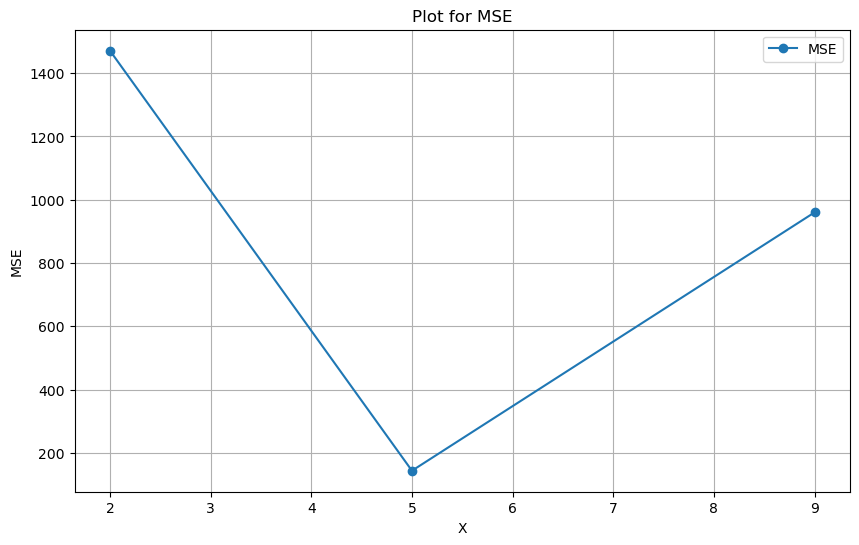

In [38]:
plt.figure(figsize=(10,6))
plt.title('Plot for MSE')

plt.plot(degrees, mse, marker='o',label='MSE')

plt.xlabel('X')
plt.ylabel('MSE')
plt.grid()
plt.legend()
plt.show()

## Задание 5. 

Выбрать любую отличную от варианта нелинейную функцию, зависящую
от параметров (взял из варианта 6). Приблизить данные,
найдя подходящие значения параметров. Сравнить точность с п.4.

In [39]:
def f_6(x):
    return math.exp(2 * x + 1) + 3 * math.sin(3 * x + math.pi / 7) + 3 * math.asinh(3 * x + 2) - 3

y_6 = [f_6(x) + 0.1 * e for x, e in zip(X, epsilon)]

In [40]:
X_train, X_test, y_train_6, y_test_6 = train_test_split(X, y_6, test_size=0.5, random_state=42)

mse_6 = []

for i in degrees:
    mse_6.append(mean_squared_error(y_train_6, np.polyval(gradient_descent(X_train, y_train_6, i), X_train)))

min_mse = mse.index(np.min(mse))
min_mse_6 = mse_6.index(np.min(mse_6))

In [41]:
print(f'Для моего варианта лучшим значением MSE обладает многочлен {degrees[min_mse]}-й степени: {mse[min_mse]}.')
print(f'Для 6-го варианта лучшим значением MSE обладает многочлен {degrees[min_mse_6]}-й степени: {mse_6[min_mse_6]}.')

Для моего варианта лучшим значением MSE обладает многочлен 5-й степени: 143.44015164589274.
Для 6-го варианта лучшим значением MSE обладает многочлен 2-й степени: 4.910026729386122.


## Задание 6. 

Для многочленов 5 степени добавить коэффициент регуляризации, обучить
на тренировочных данных. Построить график зависимости ошибки от силы
регуляризации.

In [42]:
alphas = np.logspace(-4, 3, 100)
mse_reg = []

for alpha in alphas:
    reg = Lasso(alpha=alpha)
    reg.fit(X_train.reshape(-1, 1), y_train)

    mse_reg.append(mean_squared_error(y_train, reg.predict(X_train.reshape(-1, 1))))

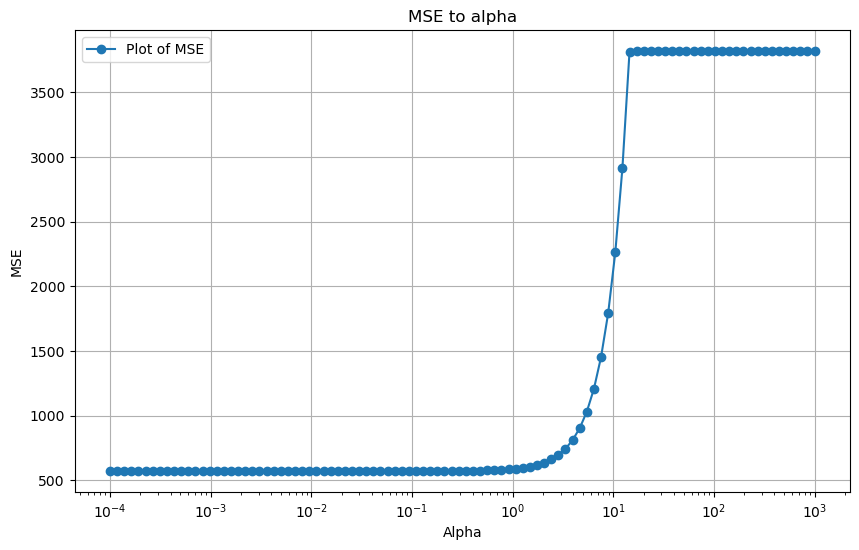

In [43]:
plt.figure(figsize=(10, 6))
plt.title('MSE to alpha')

plt.plot(alphas, mse_reg, marker='o', label='Plot of MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()